# Import packages

In [24]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.rcParams.update({'font.size' : 20})

# Read data and transform all columns to numeric

In [2]:
data = pd.read_csv('NGC2516_100m.tsv', delimiter=';', header=None)
data = data.apply(pd.to_numeric, errors='coerce')

# Define convenient aliases

In [34]:
PAR = 'parallax, mas'
PM_RA = 'pm in RA, mas/y'
G = 'G, mag'
PM_DEC = 'pm in DEC, mas/y'

# Rename columns

In [36]:
data.rename(columns = {
    8  : PAR,
    10 : PM_RA,
    15 : G,
    12 : PM_DEC
}, inplace=True)

# Setup plotting routines

In [82]:
def plot(df, x, y, name=''):
    fig, ax = plt.subplots(figsize=(16, 9))
    df.plot.scatter(x=x, y=y, ax=ax, facecolor='white', edgecolor='black', s=10)
    ax.grid(c='#aaaaaa', ls='--')
    ax.set_title(name)
    return ax

def binplot(df, x, y, bins=100, weight_func=lambda x: x):
    """Plot a discrete distribution of Y by binned X.
    Args:
        weight_func: By default, Y's are not weighted
            (weighted by identity function), but one can pass
            custom weighting function
        x, y: names of columns"""
    
    df = df.copy()
    df['bin'] = pd.cut(df[x], bins=bins)
    
    df[y] = weight_func(df[y])
    dist = df.groupby('bin')[[y]].sum()
    dist[x] = dist.index.map(lambda x: x.mid).astype(float)

    fig, ax = plt.subplots(figsize=(16, 7))
    dist.plot(x=x, y=y, ax=ax, c='black')
    ax.grid(c='#aaaaaa', ls='--')
    
    # Find maximum and write text onto the plot
    max_x = float(dist[y].idxmax().mid)
    ax.text(max_x, dist[y].max()*0.95, f"Maximum at: ~{max_x}")
    return ax

# Sample plots

(-10, 10)

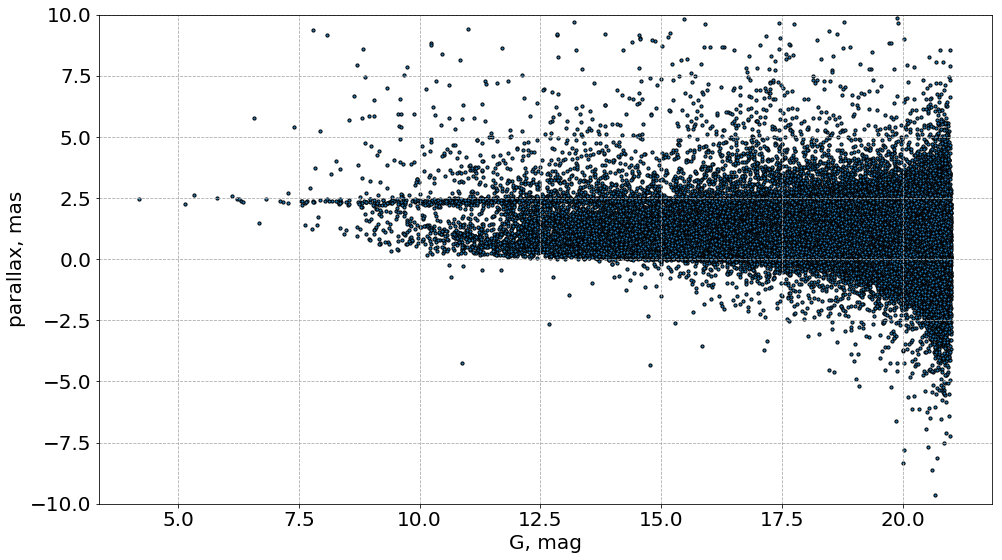

In [45]:
ax = plot(data, 'G, mag', 'parallax, mas')
ax.set_ylim(-10, 10)

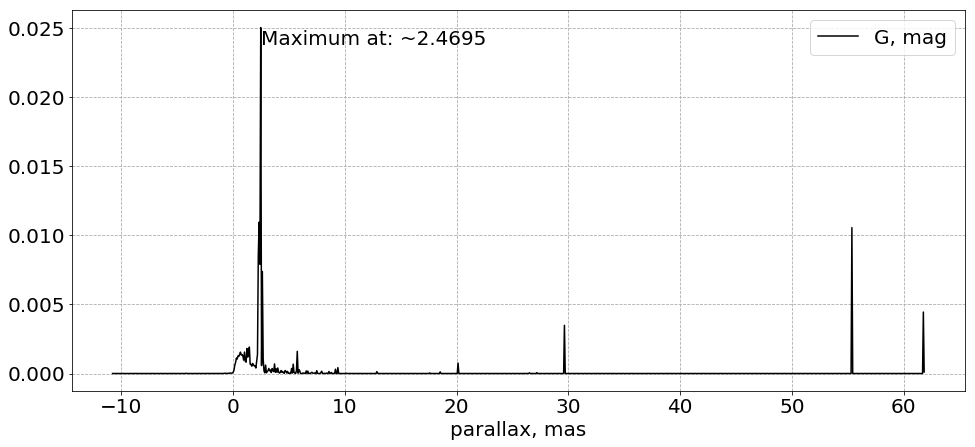

In [83]:
ax = binplot(data, PAR, G, 1000, lambda y: np.exp(-y))

# Wrap filtering into functions

In [84]:
def filter_interval(df: pd.DataFrame, y, mid_value, delta):
    mask = (mid_value - delta < data[y]) & (data[y] < mid_value + delta)
    return data.loc[mask]

In [85]:
filtered_data = filter_interval(data, PAR, 2.47, 0.0003)
filtered_data

,0,1,2,3,4,5,6,7,"parallax, mas",9,...,16,17,18,19,20,21,22,23,24,25
1,0.2140,119.522097,-60.750927,119.522058,0.0285,-60.750877,0.0248,5290722276370987648,2.4703,0.0292,...,0.0004,12.8912,0.0011,12.0278,0.0009,0.8634,NaN,NaN,0.2807,0.1443
7133,16.5813,119.901480,-60.551307,119.901425,0.2506,-60.551264,0.2776,5290819067754285440,2.4703,0.2539,...,0.0019,17.9895,0.0128,15.7765,0.0048,2.2131,NaN,NaN,0.6793,0.3415
37337,38.9247,119.695908,-61.396277,119.695863,0.1957,-61.396232,0.2055,5289896710638135808,2.4699,0.2064,...,0.0024,20.5410,0.0724,17.8090,0.0116,2.7320,NaN,NaN,NaN,NaN
56918,48.4159,119.923847,-59.971909,119.923831,1.1313,-59.971884,1.6063,5291062437777682432,2.4700,1.1877,...,0.0147,20.6116,0.1889,19.9195,0.2057,0.6921,NaN,NaN,NaN,NaN
90833,61.4632,121.090532,-60.085591,121.090487,0.0377,-60.085543,0.0401,5290814635348084992,2.4703,0.0408,...,0.0013,17.3706,0.0088,15.3848,0.0037,1.9859,NaN,NaN,0.3392,0.1770
107620,67.0757,117.335268,-61.109092,117.335273,0.5711,-61.109091,0.7161,5289388976783376000,2.4703,0.6863,...,0.0061,20.9688,0.2149,19.0228,0.0376,1.9460,NaN,NaN,NaN,NaN
134618,75.1725,118.353593,-61.874953,118.353563,0.1770,-61.874951,0.1923,5290604830484605056,2.4701,0.2013,...,0.0016,19.9923,0.0504,17.2588,0.0064,2.7335,NaN,NaN,NaN,NaN
142834,77.5106,121.239412,-61.744556,121.239363,0.0473,-61.744507,0.0493,5289721166734073856,2.4703,0.0515,...,0.0008,17.6803,0.0079,15.6163,0.0020,2.0640,NaN,NaN,0.0543,0.0303
145330,78.2093,118.149858,-61.879724,118.149829,0.9548,-61.879727,1.1544,5289106612750287488,2.4698,1.0486,...,0.0120,21.4486,0.2489,19.4903,0.0943,1.9583,NaN,NaN,NaN,NaN
161427,82.5007,120.504802,-59.469473,120.504757,0.0578,-59.469423,0.0654,5291090642826598656,2.4701,0.0619,...,0.0010,18.1377,0.0160,15.6924,0.0038,2.4453,NaN,NaN,NaN,NaN


# You can now save your filtered data to file (if needed) and filter it once more

In [87]:
filtered_data.to_csv('filtered_data.csv', sep=';', index=False, header=False)

In [88]:
def filter_something_else(df, some, important, params):
    # some stuff here
    return df

In [ ]:
filtered_data = filter_something_else(filtered_data)